In [519]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torchsummary import summary

import PIL
import shutil
import zipfile
import glob
import os
import time

파일 설정, device는 cuda로

In [520]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
dataDir = './dataset/AI-DATASET/data'

trainData_dir = os.path.join(dataDir, 'trainData')
train_dir = os.path.join(dataDir, 'train')
test_dir = os.path.join(dataDir, 'test')

beverage_dir = os.path.join(trainData_dir, 'beverage')
dailynecessity_dir = os.path.join(trainData_dir, 'dailynecessity')
iceCream_dir = os.path.join(trainData_dir, 'iceCream')
instanceFood_dir = os.path.join(trainData_dir, 'instanceFood')
Snack_dir = os.path.join(trainData_dir, 'Snack')


beverage_files = [f'beverage.{i}.jpg' for i in range(1,  501)]

dailynecessity_files = [f'dailynecessity.{i}.jpg' for i in range(1, 501
)]
iceCream_files = [f'iceCream.{i}.jpg' for i in range(1, 501)]
instanceFood_files = [f'instanceFood.{i}.jpg' for i in range(1, 501)]
Snack_files = [f'Snack.{i}.jpg' for i in range(1, 501)]


"""
train, valid, test 폴더 생성
"""
train_set_dir = os.path.join(train_dir, 'train')
# os.mkdir(train_set_dir)
valid_set_dir = os.path.join(train_dir, 'valid')
# os.mkdir(valid_set_dir)
test_set_dir = os.path.join(train_dir, 'test')
# os.mkdir(test_set_dir)
"""

for beverage, dailynecessity, iceCream, instanceFood, snack in zip(beverage_files[:300], dailynecessity_files[:300], iceCream_files[:300], instanceFood_files[:300], Snack_files[:300]):
    src = os.path.join(train_dir, beverage)
    dst = os.path.join(train_set_dir, beverage)
    shutil.move(src, dst)

    src = os.path.join(train_dir, dailynecessity)
    dst = os.path.join(train_set_dir, dailynecessity)
    shutil.move(src, dst)

    src = os.path.join(train_dir, iceCream)
    dst = os.path.join(train_set_dir, iceCream)
    shutil.move(src, dst)
    
    
    src = os.path.join(train_dir, instanceFood)
    dst = os.path.join(train_set_dir, instanceFood)
    shutil.move(src, dst)

    src = os.path.join(train_dir, snack)
    dst = os.path.join(train_set_dir, snack)
    shutil.move(src, dst)

for beverage, dailynecessity, iceCream, instanceFood, snack in zip(beverage_files[300:400], dailynecessity_files[300:400], iceCream_files[300:400], instanceFood_files[300:400], Snack_files[300:400]):
    src = os.path.join(train_dir, beverage)
    dst = os.path.join(valid_set_dir, beverage)
    shutil.move(src, dst)

    src = os.path.join(train_dir, dailynecessity)
    dst = os.path.join(valid_set_dir, dailynecessity)
    shutil.move(src, dst)

    src = os.path.join(train_dir, iceCream)
    dst = os.path.join(valid_set_dir, iceCream)
    shutil.move(src, dst)
    
    
    src = os.path.join(train_dir, instanceFood)
    dst = os.path.join(valid_set_dir, instanceFood)
    shutil.move(src, dst)

    src = os.path.join(train_dir, snack)
    dst = os.path.join(valid_set_dir, snack)
    shutil.move(src, dst)

for beverage, dailynecessity, iceCream, instanceFood, snack in zip(beverage_files[400:500], dailynecessity_files[400:500], iceCream_files[400:500], instanceFood_files[400:500], Snack_files[400:500]):
    src = os.path.join(train_dir, beverage)
    dst = os.path.join(test_set_dir, beverage)
    shutil.move(src, dst)

    src = os.path.join(train_dir, dailynecessity)
    dst = os.path.join(test_set_dir, dailynecessity)
    shutil.move(src, dst)

    src = os.path.join(train_dir, iceCream)
    dst = os.path.join(test_set_dir, iceCream)
    shutil.move(src, dst)
    
    
    src = os.path.join(train_dir, instanceFood)
    dst = os.path.join(test_set_dir, instanceFood)
    shutil.move(src, dst)

    src = os.path.join(train_dir, snack)
    dst = os.path.join(test_set_dir, snack)
    shutil.move(src, dst)
        """

'\n\nfor beverage, dailynecessity, iceCream, instanceFood, snack in zip(beverage_files[:300], dailynecessity_files[:300], iceCream_files[:300], instanceFood_files[:300], Snack_files[:300]):\n    src = os.path.join(train_dir, beverage)\n    dst = os.path.join(train_set_dir, beverage)\n    shutil.move(src, dst)\n\n    src = os.path.join(train_dir, dailynecessity)\n    dst = os.path.join(train_set_dir, dailynecessity)\n    shutil.move(src, dst)\n\n    src = os.path.join(train_dir, iceCream)\n    dst = os.path.join(train_set_dir, iceCream)\n    shutil.move(src, dst)\n    \n    \n    src = os.path.join(train_dir, instanceFood)\n    dst = os.path.join(train_set_dir, instanceFood)\n    shutil.move(src, dst)\n\n    src = os.path.join(train_dir, snack)\n    dst = os.path.join(train_set_dir, snack)\n    shutil.move(src, dst)\n\nfor beverage, dailynecessity, iceCream, instanceFood, snack in zip(beverage_files[300:400], dailynecessity_files[300:400], iceCream_files[300:400], instanceFood_files[300

In [521]:

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, files, root, mode='train', transform=None):
        self.files = files
        self.root = root
        self.mode = mode
        self.transform=transform
        if 'beverage' in files[0]:
            self.label = 0
        elif 'dailynecessity' in files[0]:
            self.label = 1
        elif 'iceCream' in files[0]:
            self.label = 2
        elif 'instanceFood' in files[0]:
            self.label = 3
        elif 'Snack' in files[0]:
            self.label = 4
    
    def __len__(self):
        return len(self.files)
    
    def __getitem__(self, index):
        img = PIL.Image.open(os.path.join(self.root, self.files[index]))

        if self.transform:
            img = self.transform(img)
        if self.mode == 'train':
            return img, np.array([self.label])
        else:
            return img, self.files[index]

사용할 모델

In [522]:
model = torchvision.models.resnet50(weights=True)

num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(num_ftrs, 1024),
    nn.Dropout(0.2),
    nn.Linear(1024, 512),
    nn.Dropout(0.1),
    nn.Linear(512, 1),
    nn.Sigmoid()
)

model.cuda()
summary(model, input_size=(3,224,224))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

모델 설정 및 정상적인 파싱 확인

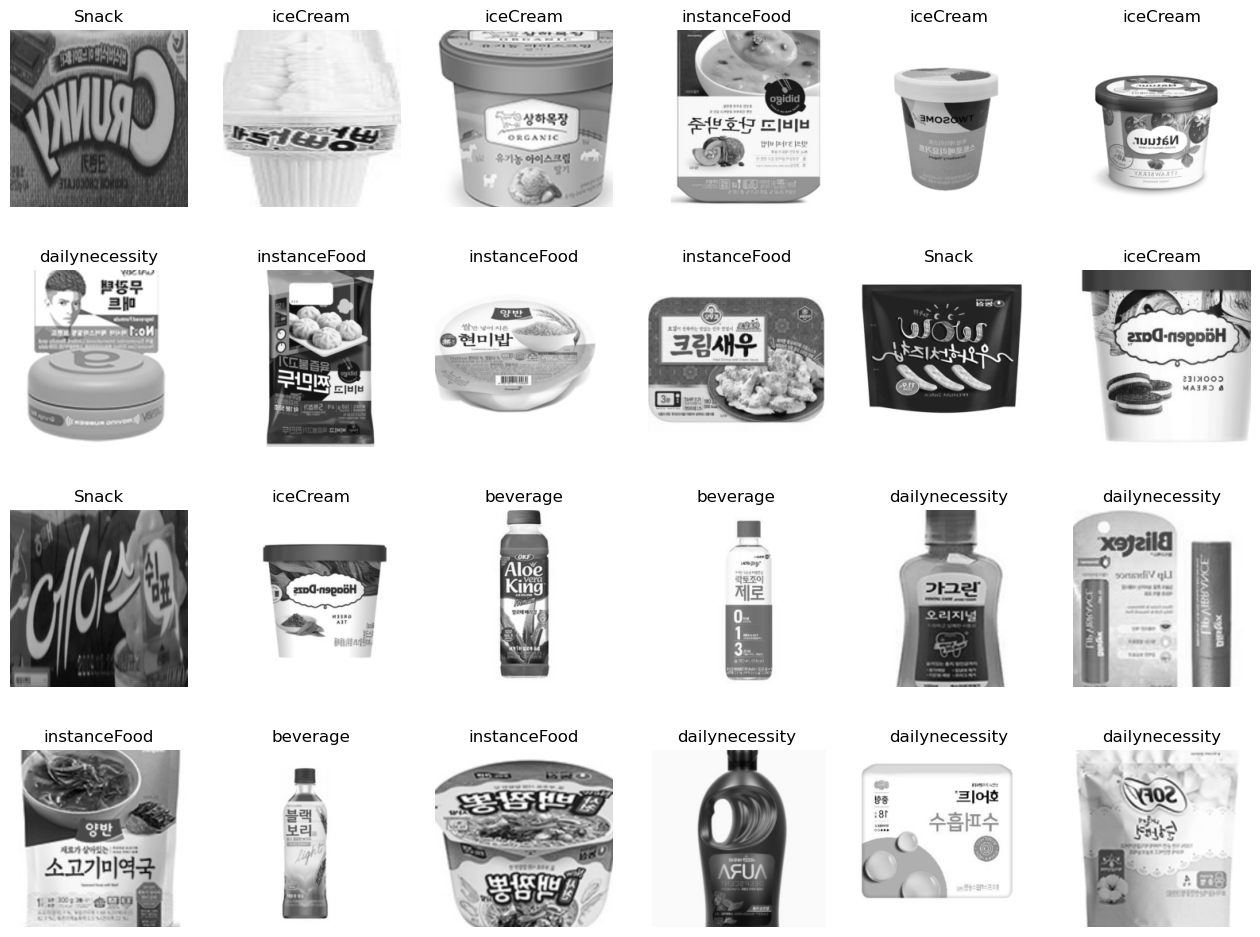

In [523]:


train_transform = torchvision.transforms.Compose([
    torchvision.transforms.Grayscale(num_output_channels=3),
    torchvision.transforms.Resize((256,256)),
    torchvision.transforms.RandomCrop(224),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(),
])
test_transform = torchvision.transforms.Compose([
    torchvision.transforms.Grayscale(num_output_channels=3),
    torchvision.transforms.Resize((224,244)),
    torchvision.transforms.ToTensor(),
])


train_beverage_dataset = CustomDataset(beverage_files[:300], train_set_dir, transform=train_transform)
train_dailynecessity_dataset = CustomDataset(dailynecessity_files[:300], train_set_dir, transform=train_transform)
train_iceCream_dataset = CustomDataset(iceCream_files[:300], train_set_dir, transform=train_transform)
train_instanceFoods_dataset = CustomDataset(instanceFood_files[:300], train_set_dir, transform=train_transform)
train_Snack_dataset = CustomDataset(Snack_files[:300], train_set_dir, transform=train_transform)
train_dataset = torch.utils.data.ConcatDataset([train_beverage_dataset, train_dailynecessity_dataset, train_iceCream_dataset, train_instanceFoods_dataset, train_Snack_dataset])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

valid_beverage_dataset = CustomDataset(beverage_files[300:400], valid_set_dir, transform=test_transform)
valid_dailynecessity_dataset = CustomDataset(dailynecessity_files[300:400], valid_set_dir, transform=test_transform)
valid_iceCream_dataset = CustomDataset(iceCream_files[300:400], valid_set_dir, transform=test_transform)
valid_instanceFoods_dataset = CustomDataset(instanceFood_files[300:400], valid_set_dir, transform=test_transform)
valid_Snack_dataset = CustomDataset(Snack_files[300:400], valid_set_dir, transform=test_transform)
valid_dataset = torch.utils.data.ConcatDataset([valid_beverage_dataset, valid_dailynecessity_dataset, valid_iceCream_dataset, valid_instanceFoods_dataset, valid_Snack_dataset])
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=32, shuffle=True)


test_beverage_dataset = CustomDataset(beverage_files[400:], test_set_dir, transform=test_transform)
test_dailynecessity_dataset = CustomDataset(dailynecessity_files[:400], test_set_dir, transform=test_transform)
test_iceCream_dataset = CustomDataset(iceCream_files[400:], valid_set_dir, transform=test_transform)
test_instanceFoods_dataset = CustomDataset(instanceFood_files[400:], test_set_dir, transform=test_transform)
test_Snack_dataset = CustomDataset(Snack_files[400:], test_set_dir, transform=test_transform)
test_dataset = torch.utils.data.ConcatDataset([test_beverage_dataset, test_dailynecessity_dataset, test_iceCream_dataset, test_instanceFoods_dataset, test_Snack_dataset])
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)


samples, labels = iter(train_loader).__next__()
classes = {0:'beverage', 1:'dailynecessity', 2:'iceCream', 3:'instanceFood', 4: 'Snack'}
fig = plt.figure(figsize=(16,24))
for i in range(24):
    a = fig.add_subplot(4,6,i+1)
    a.set_title(classes[labels[i].item()])
    a.axis('off')
    a.imshow(np.transpose(samples[i].numpy(), (1,2,0)))
plt.subplots_adjust(bottom=0.2, top=0.6, hspace=0)


In [524]:
def fit(model, criterion, optimizer, epochs, train_loader, valid_loader):
    model.train()
    
    train_loss = 0
    train_acc = 0
    train_correct = 0
    
    train_losses = []
    train_accuracies = []
    valid_losses = []
    valid_accuracies = []
    
    for epoch in range(epochs):
        start = time.time()
        for train_x, train_y in train_loader:
            model.train()
            train_x, train_y = train_x.to(device), train_y.to(device).float()
            optimizer.zero_grad()
            pred = model(train_x)
            loss = criterion(pred, train_y)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            
            y_pred = pred.cpu()
            y_pred[y_pred >= 0.5] = 1
            y_pred[y_pred < 0.5] = 0
            train_correct += y_pred.eq(train_y.cpu()).int().sum()
        
        # validation data check
        valid_loss = 0
        valid_acc = 0
        valid_correct = 0
        for valid_x, valid_y in valid_loader:
            with torch.no_grad():
                model.eval()
                valid_x, valid_y = valid_x.to(device), valid_y.to(device).float()
                pred = model(valid_x)
                loss = criterion(pred, valid_y)
            valid_loss += loss.item()
            
            y_pred = pred.cpu()
            y_pred[y_pred >= 0.5] = 1
            y_pred[y_pred < 0.5] = 0
            valid_correct += y_pred.eq(valid_y.cpu()).int().sum()
        
        train_acc = train_correct/len(train_loader.dataset)
        valid_acc = valid_correct/len(valid_loader.dataset)
        
        print(f'{time.time() - start:.3f}sec : [Epoch {epoch+1}/{epochs}] -> train loss: {train_loss/len(train_loader):.4f}, train acc: {train_acc*100:.3f}% / valid loss: {valid_loss/len(valid_loader):.4f}, valid acc: {valid_acc*100:.3f}%')
        
        train_losses.append(train_loss/len(train_loader))
        train_accuracies.append(train_acc)
        valid_losses.append(valid_loss/len(valid_loader))
        valid_accuracies.append(valid_acc)
        
        train_loss = 0
        train_acc = 0
        train_correct = 0
    
    plt.plot(train_losses, label='loss')
    plt.plot(train_accuracies, label='accuracy')
    plt.legend()
    plt.title('train loss and accuracy')
    plt.show()
    
    plt.plot(valid_losses, label='loss')
    plt.plot(valid_accuracies, label='accuracy')
    plt.legend()
    plt.title('valid loss and accuracy')
    plt.show()

def eval(model, criterion, test_loader):
    with torch.no_grad():
        model.eval()
        correct = 0
        losses = 0
        for test_x, test_y in test_loader:
            test_x, test_y = test_x.to(device), test_y.to(device).float()
            pred = model(test_x)
            loss = criterion(pred, test_y)
            
            y_pred = pred.cpu()
            y_pred[y_pred >= 0.5] = 1
            y_pred[y_pred < 0.5] = 0
            
            losses += loss.item()
            correct += y_pred.eq(test_y.cpu()).int().sum()
    print(f'eval loss: {losses/len(test_loader):.4f}, eval acc: {correct/len(test_loader.dataset)*100:.3f}%')

In [525]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
 
fit(model, criterion, optimizer, 10, train_loader, valid_loader)
eval(model, criterion, test_loader)


KeyboardInterrupt: 